## Multiple Variable Linear Regression
In this lab, we will extend the data structures and previously developed routines to support multiple features. Several routines are updated making the lab appear lengthy, but it makes minor adjustments to previous routines making it quick to review.


<a class="anchor" id="1.1_goal"></a>
## 1.1 Goals 
- Extend our regression model routines to support multiple features
- extend data structures to support multiple features
- Utilize NumPy no.dot to vectorize their implementations for speed and simplicity

## 1.2 Tools

In this lab, we will make use of:
- Numpy, a popular library for scientific computing
- Matplotlib, a popular library for plotting data

In [2]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt

## 2. Problem Statement
We will use the motivating example of housing price prediction. The training dataset contains three examples with four features (size, bedrooms, floors and age) shown in the below.  
We will predict the price for other house such as a house with 48 ${m}^{2}$, 2 bedrooms, 1 floor, and 40 years old. 

In [3]:
X_train = np.array([[55, 5, 1, 28], [43, 4, 1, 45], [36, 3, 2, 40], [26, 2, 1, 35]])
y_train = np.array([55, 41, 28, 15])

## 2.1 Matrix X containg our examples
Similar to the table above, examples are stored in a NumPy matrix `X_train`. Each row of the matrix represents one example. When you have $m$ training examples ( $m$ is three in our example), and there are $n$ features (four in our example), $\mathbf{X}$ is a matrix with dimensions ($m$, $n$) (m rows, n columns).

$$\mathbf{X} = 
\begin{pmatrix}
x^{(0)}_0 & x^{(0)}_1 & \cdots & x^{(0)}_{n-1} \\
x^{(1)}_0 & x^{(1)}_1 & \cdots & x^{(1)}_{n-1} \\
\cdots \\
x^{(m-1)}_0 & x^{(m-1)}_1 & \cdots & x^{(m-1)}_{n-1} 
\end{pmatrix}
$$
notation:
- $\mathbf{x}^{(i)}$ is vector containing example i. $\mathbf{x}^{(i)}$ $ = (x^{(i)}_0, x^{(i)}_1, \cdots, x^{(i)}_{n-1})$
-$x^{(i)}_j$ is element j in example i. The superscript in parenthesis indicates the example number while the subscript represents an element. 

In [4]:
#data is stored in numpy array matrix
print(f"X shape: {X_train.shape}, X type:{type(X_train)}")
print(X_train)
print(f"y shape: {y_train.shape}, y type: {type(y_train)}")
print(y_train)

X shape: (4, 4), X type:<class 'numpy.ndarray'>
[[55  5  1 28]
 [43  4  1 45]
 [36  3  2 40]
 [26  2  1 35]]
y shape: (4,), y type: <class 'numpy.ndarray'>
[55 41 28 15]


##  2.2 Parameter vector w, b

*$\mathbf{w}$ is a vector with $n$ elements. 
- Each element contains the parameter associated with one feature. 
- In our dataset, n is 4. 
-notionally, we draw this as a column vector

$$\mathbf{w}=\begin{pmatrix}
w_0\\
w_1\\
\cdots\\
w_{n-1}
\end{pmatrix}
$$
* $b$ is a scalar parameter.

For demonstration. $\mathbf{w}$ and $b$ will be loaded with some initial selected values that are near the optimal. $\mathbf{w}$ is a 1-D NumPy vector

In [5]:
b_init = 785
w_init = np.array([0.39, 18, -53, -26])
print(f"w_init shape: {w_init.shape}, b_init type : {type(b_init)}")

w_init shape: (4,), b_init type : <class 'int'>


##  3. Model Prediction WIth Multiple Variables
The model's prediction with multiple variables is given by the linear model:
$$ f_{\mathbf{w}, b}(\mathbf{x})=w_0x_0+w_1x_1+...+w_{n-1}x_{n-1}+b\tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x})=\mathbf{w} \cdot \mathbf{x} + b \tag{2} $$
where $\cdot$ is a vector `dot product`

To demonstrate the dot product, we will implement prediction using (1) and (2)

## 3.1 Single Prediction element by element
Our previous prediction multipled one feature value by one parameter and added a bias parameter. A direct extension of our previous implementation of prediction to multiple features would be to implement (1) above using loop over each element, performing the multiply with its parameter and then adding the bias parameter at the end. 

In [6]:
def predict_single_loop(x, w, b):
    """
    single predict using linear regression
    Arg:
    x (ndarray) : Shape (n,) example with multiple features
    w (ndarray) : Shape (n,) model parameters
    b (scalar)  : model parameter
    
    Return
    p(scalar)   : prediction
    """
    n = x.shape[0]
    p = 0
    for i in range(n):
        p_i = x[i] * w[i]
        p = p + p_i
    p = p + b
    return p 

In [7]:
# get a row from our training data
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (4,), x_vec value: [55  5  1 28]
f_wb shape (), prediction: 115.45000000000005


Note the shape of `x_vec`. It is a 1-D NumPy vector with 4 elements, (4,). The results, `f_wb` is a scalar

## 3.2 Single Prediction, vector
Noting that equation (1) above can be implemented using the dot product as in (2) above. We can make use of vector operations to speed up predictions. Recall from the Python/NumPy lab that Numpy `np.dot()` can be used to perform a vector dot product.

In [8]:
def predict(x, w, b):
    """
    single predict using linear regression
    Args:
    x (ndarray) : Shape (n,) example with multiple features
    w (ndarray) : Shape (n,) model parameters
    b (scalar)  : model parameter
    
    Return:
    p (scalar) : prediction
    """
    p = np.dot(x,w) + b
    return p

In [9]:
# get a row from our training data
x_vec = X_train[0,:]
print(f"x_vec shape : {x_vec.shape}, x_vec value : {x_vec}")

# make a prediction
f_wb = predict(x_vec, w_init, b_init)
print(f"f_wb shape : {f_wb.shape}, prediction: {f_wb}")

x_vec shape : (4,), x_vec value : [55  5  1 28]
f_wb shape : (), prediction: 115.45000000000005


The results and shapes are the same as the previous version which used looping. Goring forward, `np.dot` will be used for these operations. The prediction is now a single statement. Most routines will implement it directly rather than calling a separate predict routine. 

## 4. Compute Cost With Multiple Variables
The equation for the cost function with multiple vartiables $J(\mathbf{w}, b)$ is:
$$J(\mathbf{w}, b) = \frac{1}{2m} \sum\limits_{i=0}^{m-1} (f_(\mathbf{x}^{(i)})-y^{(i)})^2 \tag{3}$$
where
$$ f_{\mathbf{w}, b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b \tag{4}$$

In contrast to previous labs, $\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors rather than scalars supporting multiple features. 

Below is an implementation of equation (3) and (4). Note that this uses a standard pattern for this course where a for loop over all `m` examples is used

In [10]:
def compute_cost(X, y, w, b):
    """
    compute cost
    Args:
    X (ndarray (m,n)) : Data, m examples with n features
    y (ndarray (m,))  : target values
    w (ndarray (n,))  : model parameters
    b (scalar)        : model parameter
    
    Returns:
    cost (scalar)     : cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost = cost + (f_wb_i - y[i])**2
    cost = cost / (2 * m)
    return cost

In [11]:
#Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f"Cost at optimal w : {cost}")

Cost at optimal w : 35064.604575000005


## 5. Gradient Descent With Multiple Variables
Gradient descent for multiple varialbes: 
$$\begin{align*} \text{repeat}&\text{ until convergence:}\;  \lbrace \newline\;
& w_j = w_j - \alpha \frac{\partial J(\mathbf{w}, b)}{\partial w_j} \tag{5} \; & \text{for j = 0 .. n-1} \newline
&b\ =b - \alpha \frac{\partial J(\mathbf{w}, b)}{\partial b} \newline \rbrace
\end{align*}$$
where, n is the number of features, parameters $w_j$, $b$, are updated simultaneously and where
$$
\begin{align}
\frac{\partial J(\mathbf{w}, b)}{\partial w_j} & = \frac{1}{m} \sum\limits_{i=0}^{m-1}(f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6} \\
\frac{\partial J(\mathbf{w},b)}{\partial b} &= \frac{1}{m} \sum\limits_{i=0}^{m-1}(f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$

* m is the number of training examples in the data set

* $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value

## 5.1 Compute Gradient with Multiple Variables
An implementation for calculating the equations (6) and (7) is below. There are many ways to implement this. In this version, there is an 
- outer loop over all m examples. 
- $\frac{\partial J(\mathbf{w},b)}{\partial b}$ for the example can be computed directly and accumulated
- In a second loop over all n features:
- $\frac{\partial J(\mathbf{w}, b)}{\partial w_j}$ is computed for each $w_j$.

In [12]:
def compute_gradient(X, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
    X (ndarray (m,n)) : Data, m examples with n features
    y (ndarray (m,))  : target values
    w (ndarray (n,))  : model parameters
    b (scalar)        : model parameter
    
    Return:
    dj_dw (ndarray (n,)) : The gradient of the cost w.r.t. the parameter w. 
    dj_db (ndarray (n,)) : The gradient of the cost w.r.t. the parameter b.
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0
    
    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i,j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_db, dj_dw

In [13]:
#Compute and display gradient
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w, b : {tmp_dj_db}')
print(f'dj_dw at initial w, b : {tmp_dj_dw}')

dj_db at initial w, b : -199.4
dj_dw at initial w, b : [-7207.015   -628.8175  -279.64   -8461.5625]


## 5.2 Gradient Descent With Multiple Variables
The routine below implements equation (5) above

In [14]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking
    num_iters gradient steps with learning rate alpha
    Args:
    X (ndarray (m,n)) : Data, m examples with n features
    y (ndarray (m,))  : target values
    w (ndarray (n,))  : model parameters
    b (scalar)        : model parameter
    cost_function     : function to compute cost
    gradient_function : function to compute the gradient
    alpha(float)      : Learning rate
    num_iters (int)   : number of iterations to run gradient descent
    
    Return:
    w (ndarray (n,))  : Updated values of model parameters
    b (scalar)        : Updated value of model parameter
    """
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i < 100000:
            J_history.append(cost_function(X, y, w, b))
            
            if i % math.ceil(num_iters/10)==0:
                print(f"iteration {i:4d}: Cost {J_history[-1]:8.2f}")
    return w, b, J_history

In [15]:
#initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0
iteration = 1000
alpha = 5.0e-7
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iteration)
print(f"b, w, found by gradient descent: {b_final:0.2f}, {w_final}")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

iteration    0: Cost   712.38
iteration  100: Cost   540.47
iteration  200: Cost   413.52
iteration  300: Cost   319.74
iteration  400: Cost   250.43
iteration  500: Cost   199.17
iteration  600: Cost   161.23
iteration  700: Cost   133.12
iteration  800: Cost   112.26
iteration  900: Cost    96.75
b, w, found by gradient descent: 0.01, [0.41317613 0.03735637 0.01004965 0.30589345]
prediction: 31.50, target value: 55
prediction: 31.70, target value: 41
prediction: 27.25, target value: 28
prediction: 21.54, target value: 15


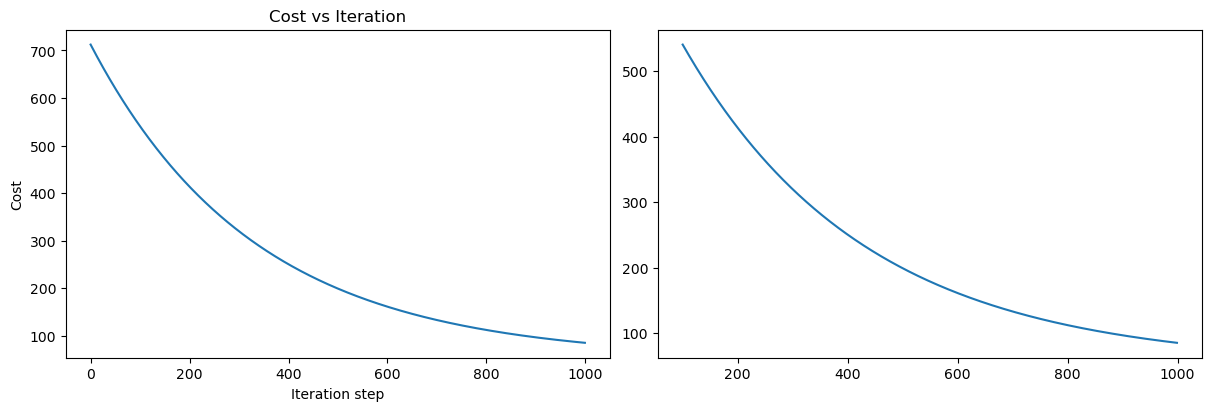

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout = True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs Iteration")
ax1.set_ylabel('Cost')
ax1.set_xlabel('Iteration step')
plt.show()

In [17]:
print(f"43 m^2 size, 3 bedroom, 2 floor, 30 age prediction {w_final[0]*43 + w_final[1]*3 + w_final[2]*2 + w_final[3] * 30 + b_final: 0.1f} 10M Won")

43 m^2 size, 3 bedroom, 2 floor, 30 age prediction  27.1 10M Won
